<a href="https://colab.research.google.com/github/nehajoshin/capstoneproject/blob/main/myhotelproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all import python libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
%matplotlib inline

In [ ]:
from google.colab import drive                    # Mounting drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the data file
hotel_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/Hotel Bookings.csv")

In [ ]:
# Taking a look to data
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
print(hotel_df.shape)

(119390, 32)


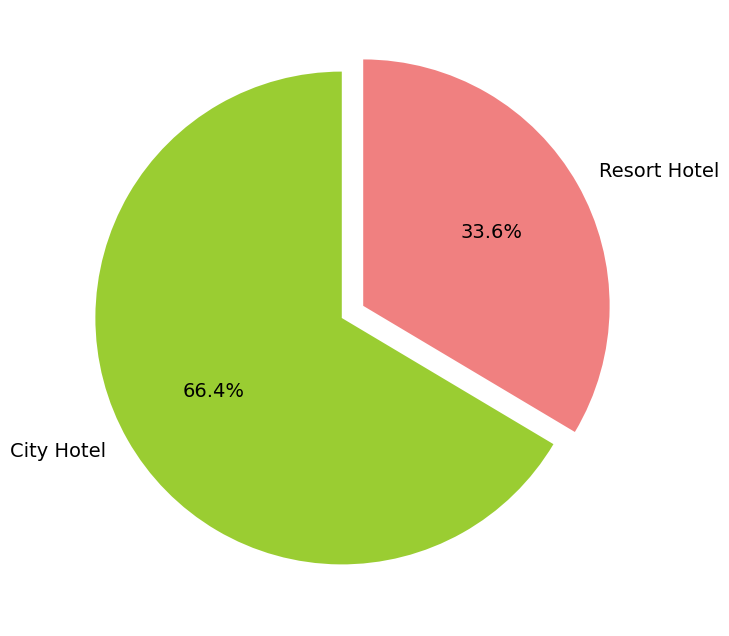

In [ ]:
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = hotel_df['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = hotel_df['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['yellowgreen', 'lightcoral']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()


In [ ]:
# Checking the non null values in the dataset.
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


We see that there are 32 columns in the dataframe and some columns like 'children', 'company', 'country' and 'agent' have null values.

In [ ]:
# Creating a copy of dataframe

df1 = hotel_df.copy()

First of all we will try to understand the meaning of all columns of the dataframe. \
For this we will see the unique values attained by each column whose meaning we are unable to understand.

In [ ]:
df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df1['is_canceled'].unique()

array([0, 1])

In [ ]:
df1['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
df1['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
df1['children'].unique()    # This column has 0 as well as null values

array([ 0.,  1.,  2., 10.,  3., nan])

### <b> Cleaning data </b>

Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps: \
1) Remove duplicate rows  \
2) Handling missing values.  \
3) Convert columns to appropriate datatypes.  \
4) Adding important columns

### <b> Step 1: Removing duplicate rows if any </b>

In [ ]:
# Finding out the number of duplicate rows.
df1[df1.duplicated()].shape

(31994, 32)

In [ ]:
# Dropping duplicate values
df1.drop_duplicates(inplace = True)

In [ ]:
# Finding out rows and columns after deletion of duplicate values.
df1.shape

(87396, 32)

### <b> Step2: Handling missing values. </b>

In [ ]:
# Columns having missing values.
df1.isnull().sum().sort_values(ascending = False)[:7]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
booking_changes           0
dtype: int64

Since, company and agent columns have comany number and agent numbers as data. There may be some cases when customer didnt booked hotel via any agent or via any company. So in that case values can be null under these columns. \
We will replace null values by 0 in these columns

In [ ]:
df1[['company','agent']] = df1[['company','agent']].fillna(0)

In [ ]:
df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction. \
So, 'nan' values are the missing values due to error of recording data. \
 \
We will replace the null values under this column with mean value of children.

In [ ]:
df1['children'].fillna(df1['children'].mean(), inplace = True)

Next column with missing value is 'country'.
This column represents the country of oriigin of customer. \
Since, this column has datatype of string. We will replace the missing value with the mode of 'country' column.

In [ ]:
df1['country'].fillna('others', inplace = True)

In [ ]:
# Checking if all null values are removed
df1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.

In [ ]:
# Rows and Columns with the 0 value
df1[df1['adults']+df1['babies']+df1['children'] == 0].shape

(166, 32)

In [ ]:
# Droping 0 values in adult,babies,children
df1.drop(df1[df1['adults']+df1['babies']+df1['children'] == 0].index, inplace = True)

### <b> Step 3: Converting columns to appropriate datatypes. </b>

In [ ]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df1[['children','company','agent']]= df1[['children', 'company', 'agent']].astype('int')


In [ ]:
# changing datatype of column 'reservation_status_date' to data_type.
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')

### <b> Step 4: Adding important columns. </b>

In [ ]:
# Adding total staying days in hotels
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df1['total_people'] = df1['adults']+df1['children']+df1['babies']

We are adding this column so that we can analyse the stay length at hotels.

In [ ]:
df1.groupby(['arrival_date_year','arrival_date_month']).count()

hotel  is_canceled  lead_time  \
arrival_date_year arrival_date_month                                  
2015              August               2447         2447       2447   
                  December             1975         1975       1975   
                  July                 1672         1672       1672   
                  November             1662         1662       1662   
                  October              2694         2694       2694   
                  September            2834         2834       2834   
2016              April                3767         3767       3767   
                  August               4415         4415       4415   
                  December             3137         3137       3137   
                  February             2799         2799       2799   
                  January              1849         1849       1849   
                  July                 3842         3842       3842   
                  June                 3515         3515       3515   
                  March                3826         3826       3826   
                  May                  3777         3777       3777   
                  November             3311         3311       3311   
                  October              4227         4227       4227   
                  September            3848         3848       3848   
2017              April                4133         4133       4133   
                  August               4380         4380       4380   
                  February             3284         3284       3284   
                  January              2836         2836       2836   
                  July                 4529         4529       4529   
                  June                 4241         4241       4241   
                  March                3663         3663       3663   
                  May                  4567         4567       4567   

                                      arrival_date_week_number  \
arrival_date_year arrival_date_month                             
2015              August                                  2447   
                  December                                1975   
                  July                                    1672   
                  November                                1662   
                  October                                 2694   
                  September                               2834   
2016              April                                   3767   
                  August                                  4415   
                  December                                3137   
                  February                                2799   
                  January                                 1849   
                  July                                    3842   
                  June                                    3515   
                  March                                   3826   
                  May                                     3777   
                  November                                3311   
                  October                                 4227   
                  September                               3848   
2017              April                                   4133   
                  August                                  4380   
                  February                                3284   
                  January                                 2836   
                  July                                    4529   
                  June                                    4241   
                  March                                   3663   
                  May                                     4567   

                                      arrival_date_day_of_month  \
arrival_date_year arrival_date_month                              
2015              August                                   2447   

## EDA ##

Lets first find the correlation between the numerical data.\
 \


Since, columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type. So we wont need to check them for correlation.\
 \

Also, we have added total_stay and total_people columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.

In [ ]:
num_df1 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]


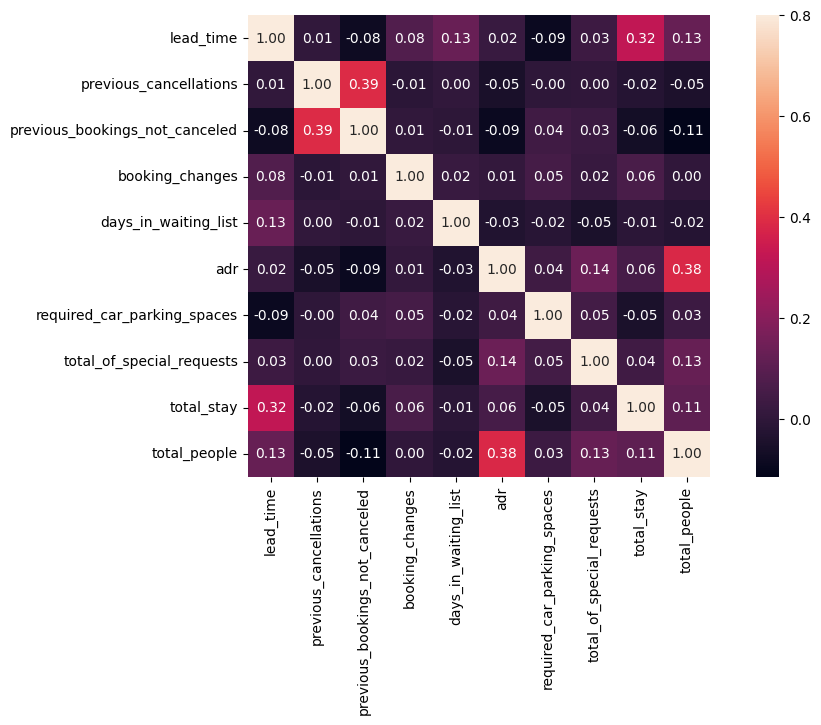

In [ ]:
#correlation matrix
corrmat = num_df1.corr()
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

1) Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.

2) adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

Lets see does length of stay affects the adr.

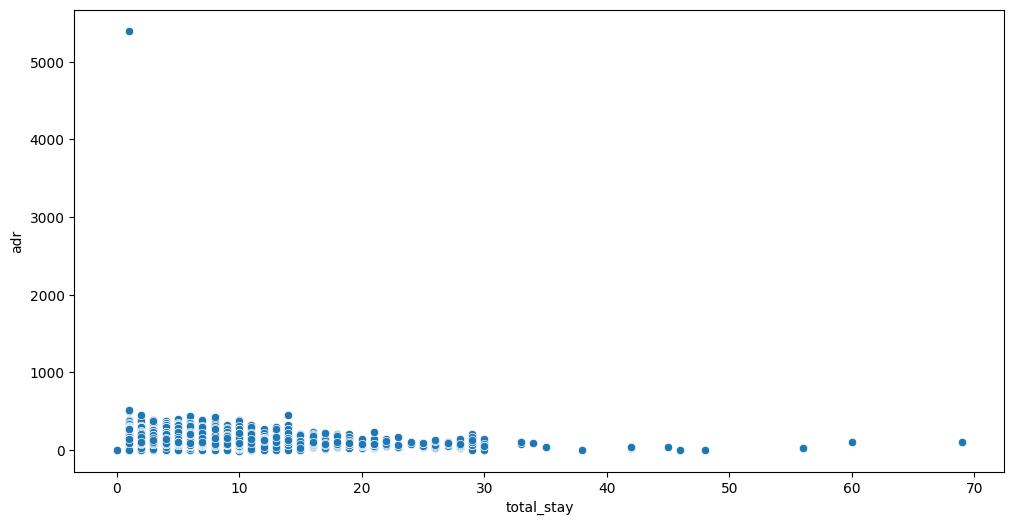

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1)
plt.show()

We notice that there is an outlier in adr, so we will remove that for better scatter plot

In [ ]:
df1.drop(df1[df1['adr'] > 5000].index, inplace = True)

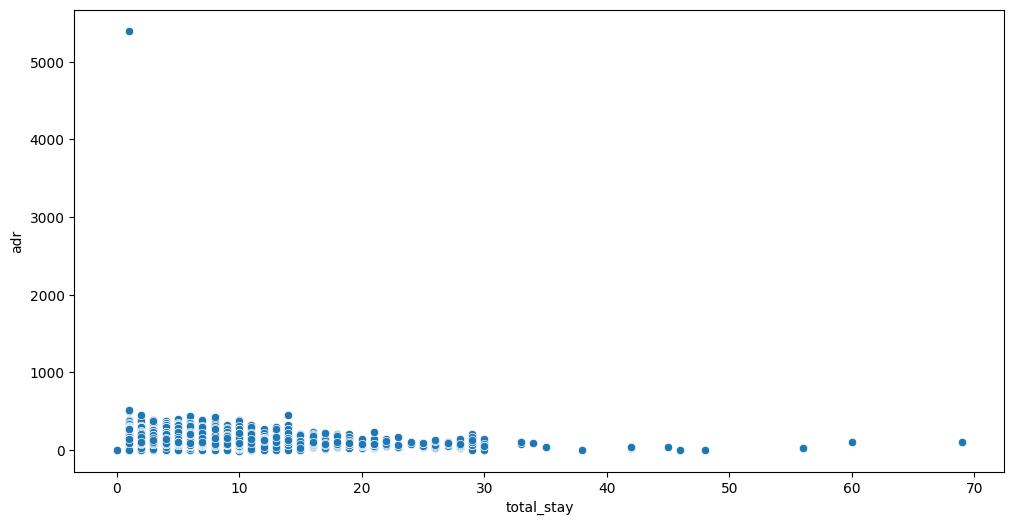

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1)
plt.show()

From the scatter plot we can see that as length of tottal_stay increases the adr decreases. This means for longer stay, the better deal for customer can be finalised.

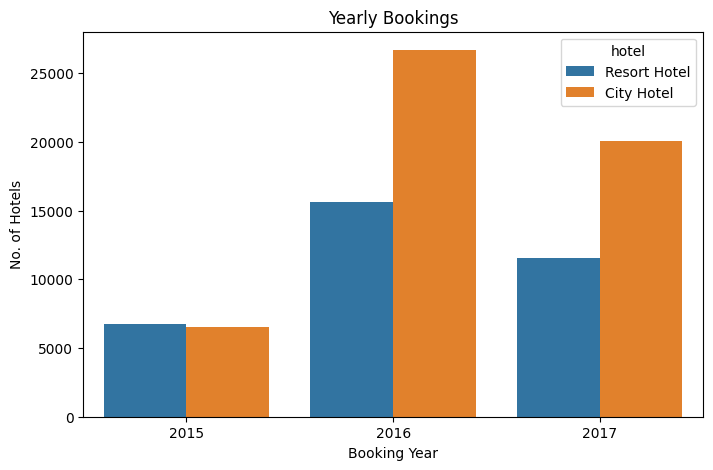

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot (x= 'arrival_date_year', data= df1, hue= 'hotel')
plt.title('Yearly Bookings')
plt.xlabel('Booking Year')
plt.ylabel('No. of Hotels')
plt.show()

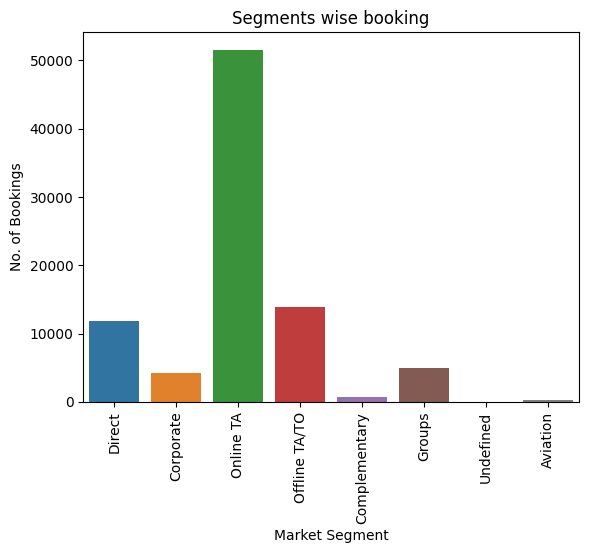

In [ ]:
ax = sns.countplot(x = "market_segment", data = df1)
plt.xticks(rotation = 90)
plt.title("Segments wise booking")
plt.xlabel('Market Segment')
plt.ylabel('No. of Bookings')
plt.show()

## Univariate Analysis

Q1) From which Country the most guest are coming?

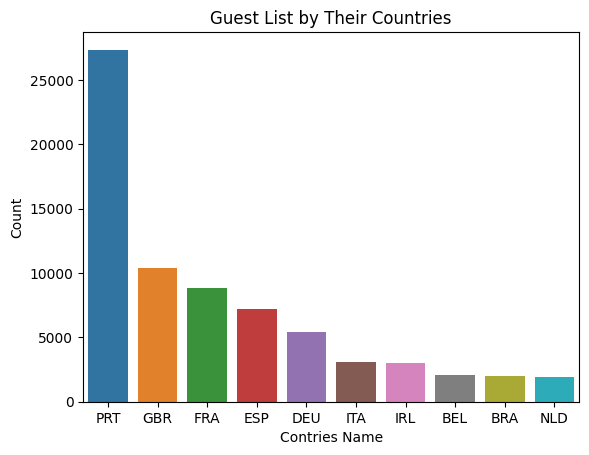

In [ ]:
y = list(df1.country.value_counts().head(10))
x = list(df1.country.value_counts().head(10).index)

sns.barplot(y=y, x=x)
plt.title('Guest List by Their Countries')
plt.xlabel('Contries Name')
plt.ylabel('Count')
plt.show()

Q2) Which room type is in most demand and which room type generates highest adr?

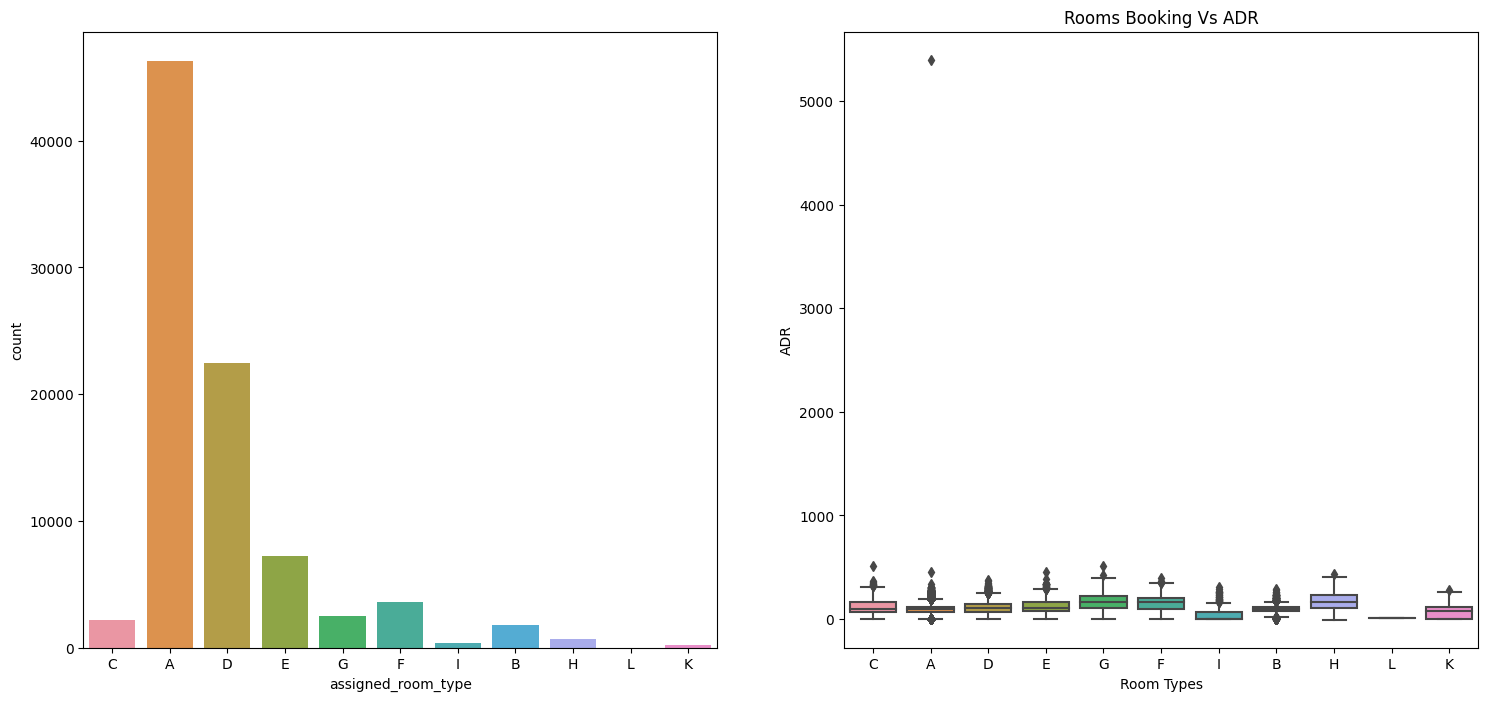

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = df1.groupby('assigned_room_type')
df1['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = df1['assigned_room_type'])
sns.boxplot(ax = axes[1], x = df1['assigned_room_type'], y = df1['adr'])
plt.title('Rooms Booking Vs ADR')
plt.xlabel('Room Types')
plt.ylabel('ADR')
plt.show()


Most demanded room type is A, but better adr rooms are of type H, G and C also. Hotels should increase the no. of room types A and H to maximise revenue.

Q3) Which meal type is most preffered meal of customers?

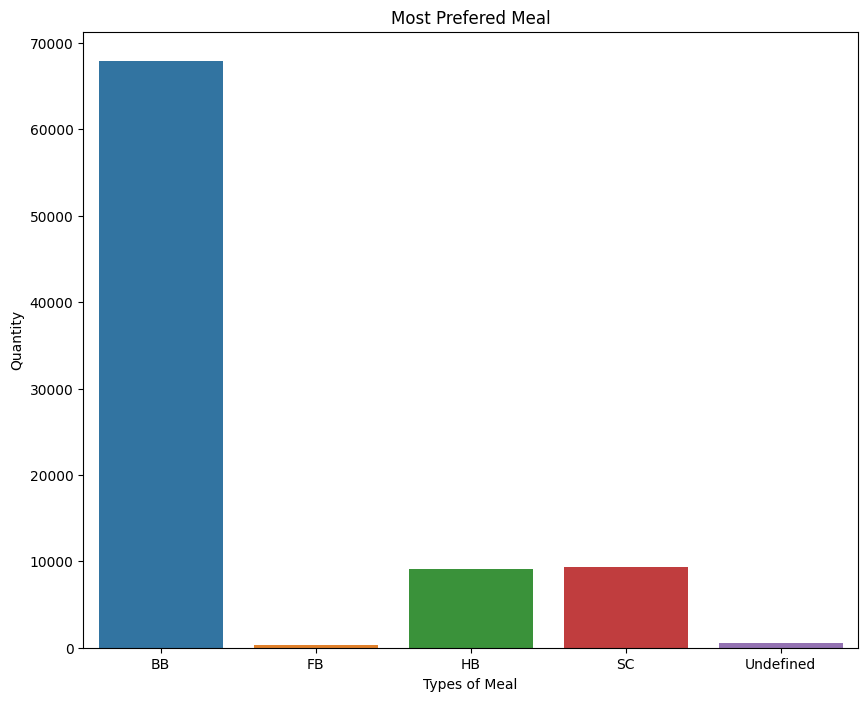

In [ ]:
plt.figure( figsize=(10, 8))

sns.countplot(x = df1['meal'])
plt.title('Most Prefered Meal')
plt.xlabel('Types of Meal')
plt.ylabel('Quantity')
plt.show()

## <b> (1) Hotel wise analysis </b>

Q1) What is percentage of bookings in each hotel?

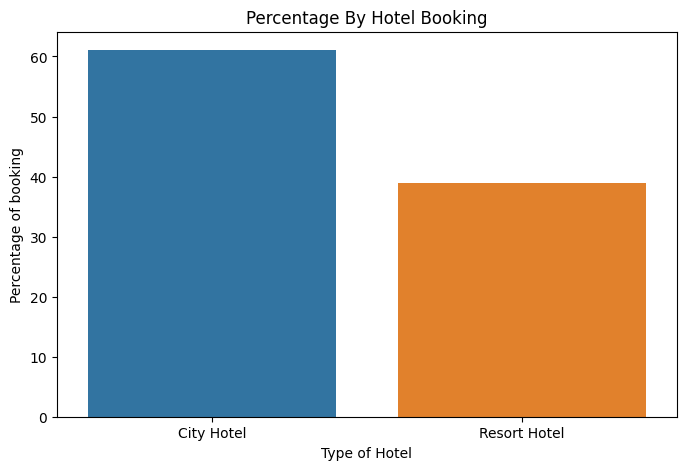

In [ ]:
grouped_by_hotel = df1.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df1.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.title('Percentage By Hotel Booking')
plt.xlabel('Type of Hotel')
plt.ylabel('Percentage of booking')
plt.show()

Around 60% bookings are for City hotel and 40% bookings are for Resort hotel.

Q2) which hotel seems to make more revenue?

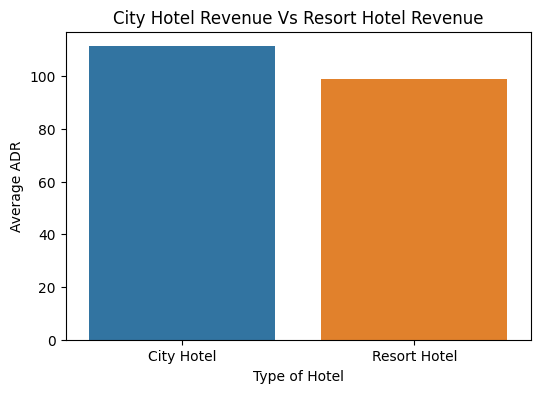

In [ ]:
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (6,4))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'] )
plt.title('City Hotel Revenue Vs Resort Hotel Revenue')
plt.xlabel('Type of Hotel')
plt.ylabel('Average ADR')
plt.show()

Avg adr of Resort hotel is slightly lower than that of City hotel. Hence, City hotel seems to be making slightly more revenue.

Q3) Which hotel has higher lead time?

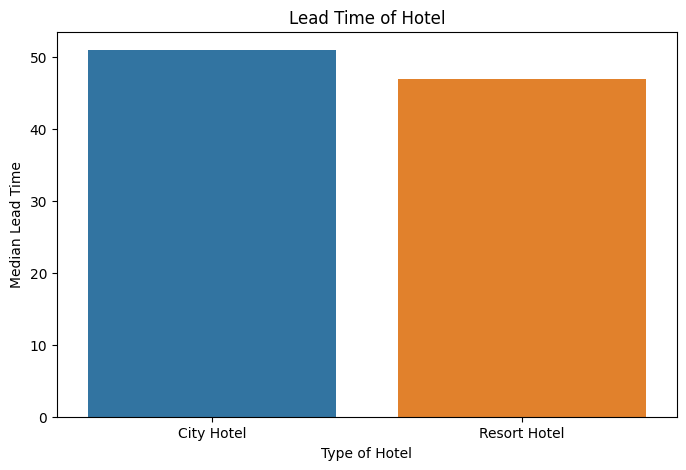

In [ ]:
d2 = grouped_by_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
plt.figure(figsize = (8,5))
sns.barplot(x = d2['hotel'], y = d2['median_lead_time'] )
plt.title('Lead Time of Hotel')
plt.xlabel('Type of Hotel')
plt.ylabel('Median Lead Time')
plt.show()

City hotel has slightly higher median lead time. Also median lead time is significantly higher in each case, this means customers generally plan their hotel visits way to early.

Q4) Which mode is higher cancellation in terms of market segmentation?

Text(0, 0.5, 'No. of Cancelled Hotel')

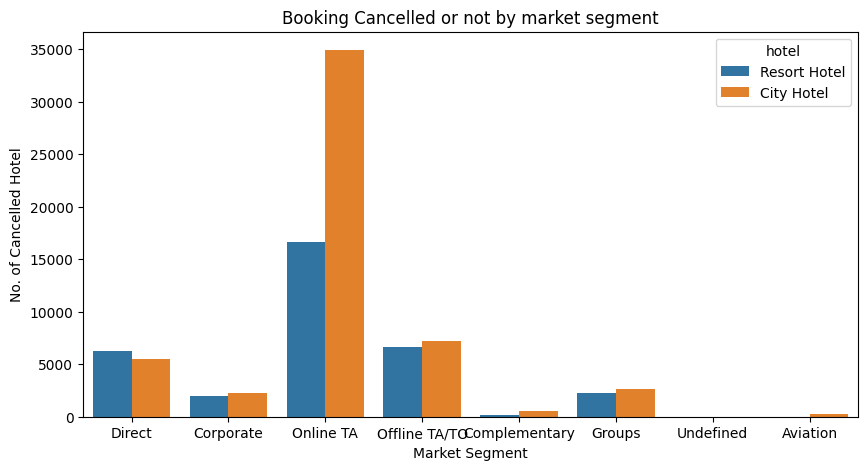

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x='market_segment',data=df1 ,hue='hotel')
plt.title("Booking Cancelled or not by market segment")
plt.xlabel('Market Segment')
plt.ylabel('No. of Cancelled Hotel')

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

Q5) Which hotel has longer waiting time?

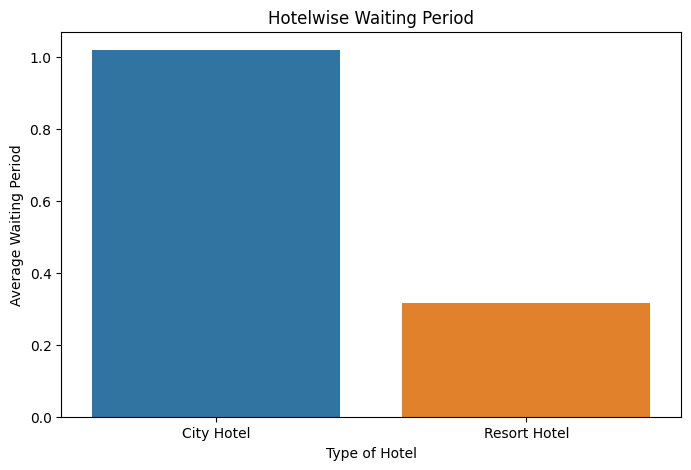

In [ ]:
d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = d5['hotel'], y = d5['avg_waiting_period'] )
plt.title('Hotelwise Waiting Period')
plt.xlabel('Type of Hotel')
plt.ylabel('Average Waiting Period')
plt.show()

City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel.

Q6) Which hotel has higher bookings cancellation rate.

In [ ]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = df1[df1['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df1.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,16035,53274,30.10
Resort Hotel,7974,33956,23.48


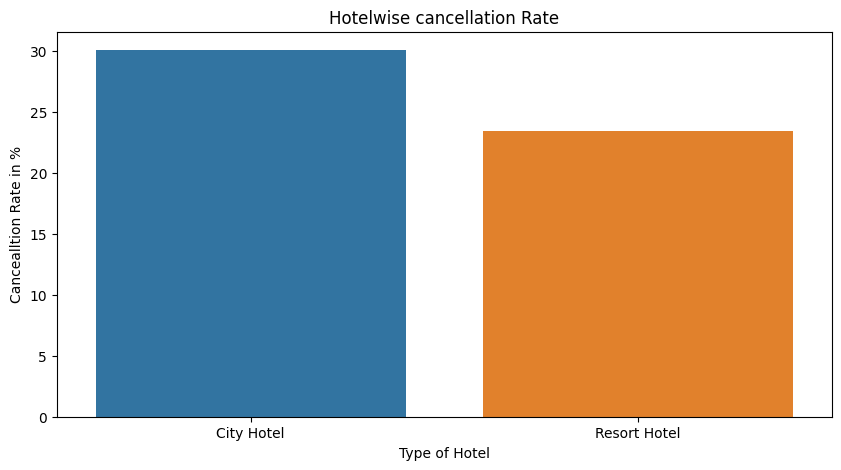

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.title('Hotelwise cancellation Rate')
plt.xlabel('Type of Hotel')
plt.ylabel('Cancealltion Rate in %')
plt.show()

Almost 30 % of City Hotel bookings got canceled, While in Resort hotel this rate is almost 25%.

Q7) Which hotel has high chance that its customer will return for another stay?

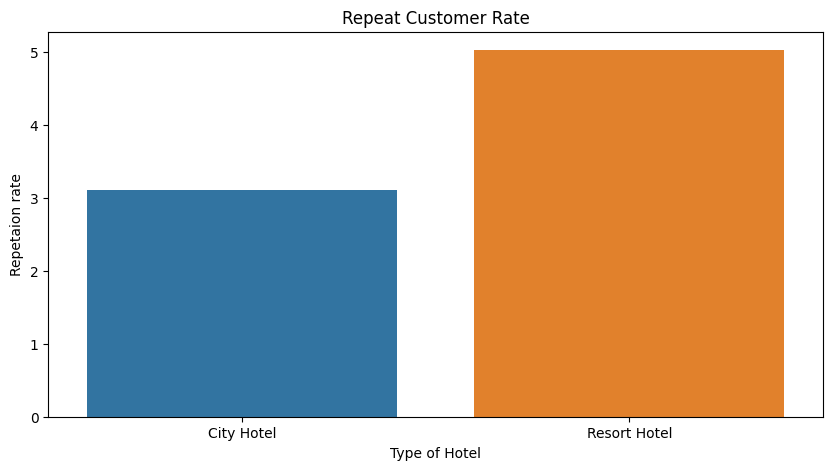

In [ ]:
# Selecting and counting repeated customers bookings
repeated_data = df1[df1['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'])
plt.title('Repeat Customer Rate')
plt.xlabel('Type of Hotel')
plt.ylabel('Repetaion rate')
plt.show()

Both hotels have very small percentage that customer will repeat, but Resort hotel has slightly higher repeat % than City Hotel.

## <b> (2) Distribution Channel wise Analysis </b>

Q1) Which is the most common channel for booking hotels?

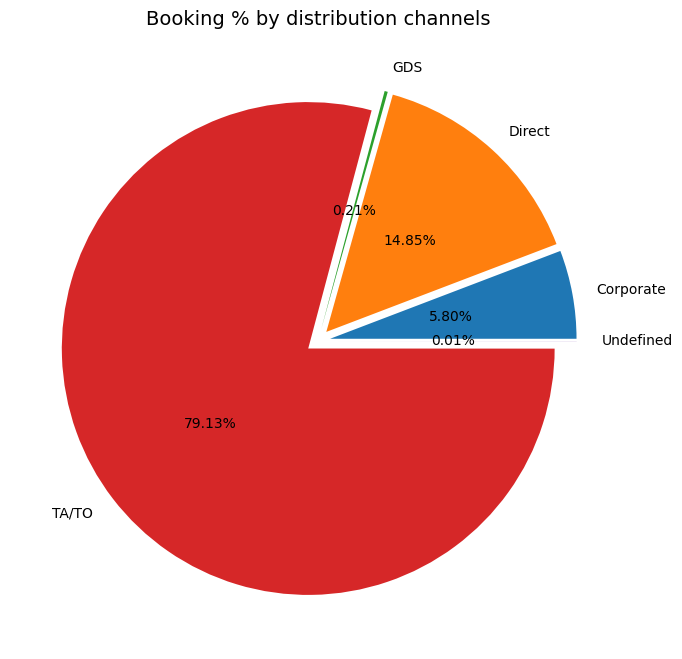

In [ ]:
group_by_dc = df1.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/df1.shape[0])*120,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
cols = ['gold', 'lightcoral','blue']
plt.title("Booking % by distribution channels", fontsize=14);

Q2) Which channel is mostly used for early booking of hotels?

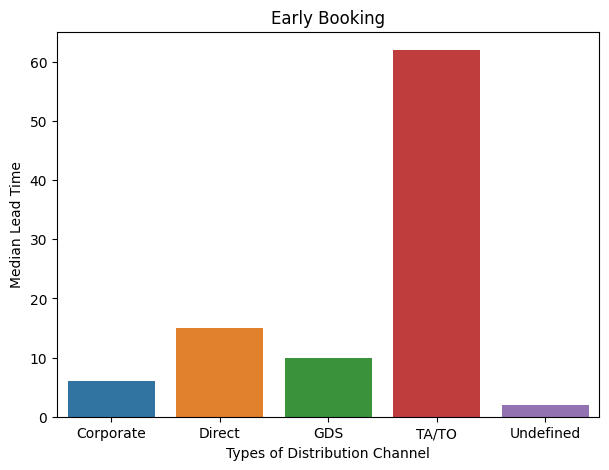

In [ ]:
group_by_dc = df1.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d2['distribution_channel'], y = d2['median_lead_time'])
plt.title('Early Booking')
plt.xlabel('Types of Distribution Channel')
plt.ylabel('Median Lead Time')
plt.show()

TA/TO is mostly used for planning Hotel visits ahead of time. But for sudden visits other mediums are most preferred.

Q3) Which channel has longer average waiting time?

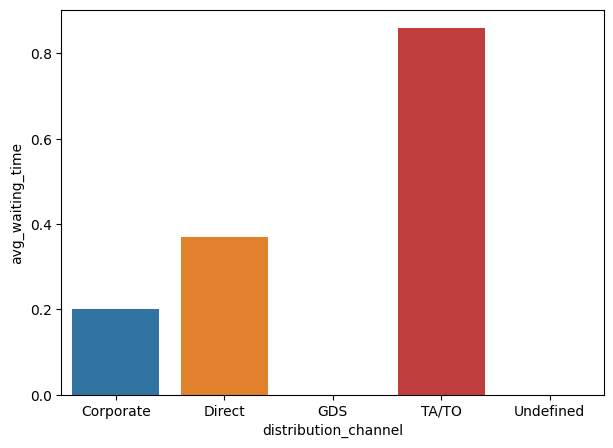

In [ ]:
d4 = pd.DataFrame(round((group_by_dc['days_in_waiting_list']).mean(),2)).reset_index().rename(columns = {'days_in_waiting_list': 'avg_waiting_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d4['distribution_channel'], y = d4['avg_waiting_time'])
plt.show()

While booking via TA/TO one may have to wait a little longer to confirm booking of rooms.

Q4) Which distribution channel brings better revenue generating deals for hotels?

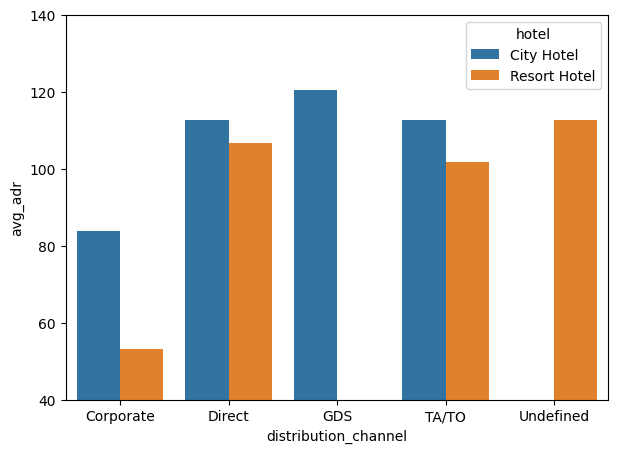

In [ ]:
group_by_dc_hotel = df1.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(40,140)
plt.show()